In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, places
import xarray as xr
import pandas as pd

%matplotlib inline

#### Example 1: load a time series at one location by accessing netCDF4 files stored on /results or /results2

In [2]:
%%time
start= dt.datetime(2017,3,1)
end=dt.datetime(2017,3,31) # the code called below (evaltools.index_model_files) includes the end date 
                          # in the values returned
basedir='/results/SalishSea/nowcast-green.201812/'
nam_fmt='nowcast'
flen=1 # files contain 1 day of data each
ftype= 'ptrc_T' # load bio files
tres=24 # 1: hourly resolution; 24: daily resolution   <- try changing to 1 and loading hourly data
flist=et.index_model_files(start,end,basedir,nam_fmt,flen,ftype,tres)
# flist contains paths: file pathes; t_0 timestemp of start of each file; t_n: timestamp of start of next file
# a list of the files we want between start and end date
print(flist)

fliste3t = et.index_model_files(start,end,basedir,nam_fmt,flen,"carp_T",tres)

                                                paths        t_0        t_n
0   /results/SalishSea/nowcast-green.201812/01mar1... 2017-03-01 2017-03-02
1   /results/SalishSea/nowcast-green.201812/02mar1... 2017-03-02 2017-03-03
2   /results/SalishSea/nowcast-green.201812/03mar1... 2017-03-03 2017-03-04
3   /results/SalishSea/nowcast-green.201812/04mar1... 2017-03-04 2017-03-05
4   /results/SalishSea/nowcast-green.201812/05mar1... 2017-03-05 2017-03-06
5   /results/SalishSea/nowcast-green.201812/06mar1... 2017-03-06 2017-03-07
6   /results/SalishSea/nowcast-green.201812/07mar1... 2017-03-07 2017-03-08
7   /results/SalishSea/nowcast-green.201812/08mar1... 2017-03-08 2017-03-09
8   /results/SalishSea/nowcast-green.201812/09mar1... 2017-03-09 2017-03-10
9   /results/SalishSea/nowcast-green.201812/10mar1... 2017-03-10 2017-03-11
10  /results/SalishSea/nowcast-green.201812/11mar1... 2017-03-11 2017-03-12
11  /results/SalishSea/nowcast-green.201812/12mar1... 2017-03-12 2017-03-13
12  /results

In [8]:
# get model i,j of location S3 from places
ij,ii=places.PLACES['S3']['NEMO grid ji']
ik=0 # choose surface level


In [9]:
carp = xr.open_mfdataset(fliste3t['paths'])
carp

<xarray.Dataset>
Dimensions:                     (axis_nbounds: 2, deptht: 40, nvertex: 4, time_counter: 31, x: 398, y: 898)
Coordinates:
    nav_lat                     (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    nav_lon                     (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
  * deptht                      (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
    time_centered               (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter                (time_counter) datetime64[ns] 2017-03-01T12:0...
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    bounds_lon                  (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    bounds_lat                  (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    area                        (time_counter, y, x) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
    deptht_bounds               (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(1, 40, 2), meta=np.ndarray>
    PAR                         (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    time_centered_bounds        (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds         (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    sigma_theta                 (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    e3t                         (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_inorganic_carbon  (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    total_alkalinity            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_oxygen            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSea_1d_20170301_20170310
    description:  auxilary variables
    title:        auxilary variables
    Conventions:  CF-1.6
    timeStamp:    2019-Jan-11 10:18:24 GMT
    uuid:         e1962d37-5d98-427b-bb50-253cacc8ec4c

In [10]:
bio=xr.open_mfdataset(flist['paths'])
# xarray mf dataset opens mutliple files at once, in this case, all these files from above
# and they are kind of combined to be one file "bio"

In [5]:
bio

<xarray.Dataset>
Dimensions:                       (axis_nbounds: 2, deptht: 40, nvertex: 4, time_counter: 31, x: 398, y: 898)
Coordinates:
    nav_lat                       (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    nav_lon                       (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
  * deptht                        (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
    time_centered                 (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter                  (time_counter) datetime64[ns] 2017-03-01T12...
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    bounds_lon                    (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    bounds_lat                    (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    area                          (time_counter, y, x) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
    deptht_bounds                 (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(1, 40, 2), meta=np.ndarray>
    nitrate                       (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    time_centered_bounds          (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds           (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    ammonium                      (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    silicon                       (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    diatoms                       (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    flagellates                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    ciliates                      (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    microzooplankton              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_organic_nitrogen    (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    particulate_organic_nitrogen  (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    biogenic_silicon              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    Fraser_tracer                 (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    mesozooplankton               (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSea_1d_20170301_20170310
    description:  biogeochemical variables
    title:        biogeochemical variables
    Conventions:  CF-1.6
    timeStamp:    2019-Jan-11 10:18:36 GMT
    uuid:         8082bc6c-e5cf-46f8-a8ce-8e6f05c20614

In [13]:
%%time
tt=bio.time_centered  # time
micZ=bio.microzooplankton.isel(deptht=ik,y=ij,x=ii)  
# you have to specify the name of the dimension,but you can put it in whatever order you want
    # isel lets you select parts of model output by index 
    # (in this case, ii, ij), as opposed to value
diat=bio.diatoms.isel(y=ij,x=ii)

e3t=carp.e3t.isel(y=ij,x=ii)

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 9.87 ms


In [14]:
intdiat=np.sum(diat*e3t,1)

CPU times: user 13.4 s, sys: 2 s, total: 15.4 s
Wall time: 23 s


(17226.5, 17256.5)

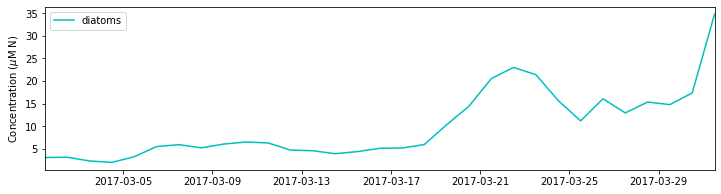

In [15]:
%%time
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(tt,intdiat,'c-',label='diatoms')
#ax.plot(tt,micZ,'-',color='darkorange',label='microzooplankton')
ax.legend(loc=2);
ax.set_ylabel('Concentration (mmol/N m2)')
ax.set_xlim(tt[0],tt[-1])

Text(0.5, 1.0, 'March 2017')

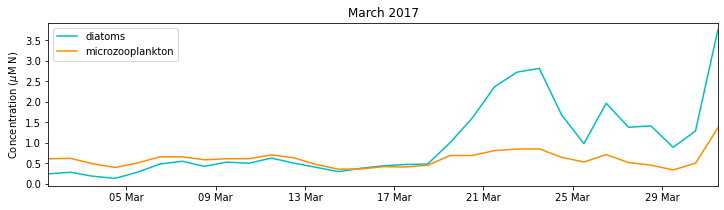

In [8]:
# Adjust date format display
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(tt,diat,'c-',label='diatoms')
ax.plot(tt,micZ,'-',color='darkorange',label='microzooplankton')
ax.legend(loc=2);
ax.set_ylabel('Concentration ($\mu$M N)')
ax.set_xlim(tt[0],tt[-1])
yearsFmt = mdates.DateFormatter('%d %b') # this changes the date display
ax.xaxis.set_major_formatter(yearsFmt) # this tells it to use the formatter on the x axis
ax.set_title('March 2017')

In [9]:
bio.close()

### repeat with hourly data over a shorter interval

In [12]:
start= dt.datetime(2017,3,1)
end=dt.datetime(2017,3,5) # the code called below (evaltools.index_model_files) includes the end date 
                          # in the values returned
tres=1 # 1: hourly resolution; 24: daily resolution   <- try changing to 1 and loading hourly data
flist=et.index_model_files(start,end,basedir,nam_fmt,flen,ftype,tres)
# flist contains paths: file pathes; t_0 timestemp of start of each file; t_n: timestamp of start of next file
flist['paths'][0]

'/results/SalishSea/nowcast-green.201812/01mar17/SalishSea_1h_20170301_20170301_ptrc_T.nc'

In [13]:
%%time
bio=xr.open_mfdataset(flist['paths'])
tt=bio.time_centered
micZ=bio.microzooplankton.isel(deptht=0,y=ij,x=ii)
diat=bio.diatoms.isel(deptht=0,y=ij,x=ii)

CPU times: user 220 ms, sys: 8 ms, total: 228 ms
Wall time: 625 ms


CPU times: user 35.9 s, sys: 6.84 s, total: 42.8 s
Wall time: 44.5 s


(17226.020833333332, 17230.979166666668)

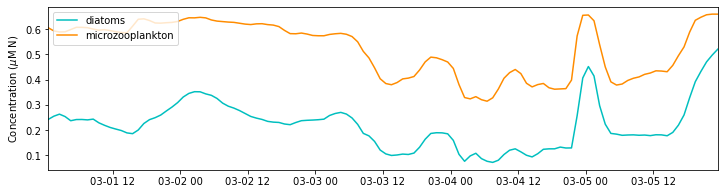

In [14]:
%%time
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(tt,diat,'c-',label='diatoms')
ax.plot(tt,micZ,'-',color='darkorange',label='microzooplankton')
ax.legend(loc=2);
ax.set_ylabel('Concentration ($\mu$M N)')
ax.set_xlim(tt[0],tt[-1])

In [1]:
bio.close()

NameError: name 'bio' is not defined

In [ ]:
carp.close()

### Aside: this can also be done using ERDDAP, but only to access 201905 model output

In [16]:
%%time
# instead of a file name, its a url to the location of the dataset on the ERDAPP site
hc1905 = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DBiologyFields1hV19-05')

CPU times: user 28 ms, sys: 0 ns, total: 28 ms
Wall time: 59.6 ms


In [17]:
%%time
hc1905

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.81 µs


<xarray.Dataset>
Dimensions:                       (depth: 40, gridX: 398, gridY: 898, time: 123240)
Coordinates:
  * time                          (time) datetime64[ns] 2007-01-01T00:30:00 ....
  * depth                         (depth) float32 0.5 1.5 2.5 ... 414.5 441.5
  * gridY                         (gridY) int16 0 1 2 3 4 ... 894 895 896 897
  * gridX                         (gridX) int16 0 1 2 3 4 ... 394 395 396 397
Data variables:
    ammonium                      (time, depth, gridY, gridX) float32 ...
    biogenic_silicon              (time, depth, gridY, gridX) float32 ...
    ciliates                      (time, depth, gridY, gridX) float32 ...
    diatoms                       (time, depth, gridY, gridX) float32 ...
    dissolved_organic_nitrogen    (time, depth, gridY, gridX) float32 ...
    flagellates                   (time, depth, gridY, gridX) float32 ...
    mesozooplankton               (time, depth, gridY, gridX) float32 ...
    microzooplankton              (time, depth, gridY, gridX) float32 ...
    nitrate                       (time, depth, gridY, gridX) float32 ...
    particulate_organic_nitrogen  (time, depth, gridY, gridX) float32 ...
    silicon                       (time, depth, gridY, gridX) float32 ...
Attributes:
    acknowledgement:           MEOPAR, ONC, Compute Canada
    cdm_data_type:             Grid
    comment:                   If you use this dataset in your research,\nple...
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    creator_email:             sallen@eoas.ubc.ca
    creator_name:              Salish Sea MEOPAR Project Contributors
    creator_url:               https://salishsea-meopar-docs.readthedocs.io/
    description:               biogeochemical variables
    drawLandMask:              over
    history:                   2021-01-21T20:03:27Z (local files)\n2021-01-21...
    infoUrl:                   https://salishsea-meopar-docs.readthedocs.io/e...
    institution:               UBC EOAS
    institution_fullname:      Earth, Ocean & Atmospheric Sciences, Universit...
    keywords:                  ammonia, ammonium, aquatic, biogenic, biogenic...
    keywords_vocabulary:       GCMD Science Keywords
    license:                   The Salish Sea MEOPAR NEMO model results are c...
    project:                   Salish Sea MEOPAR NEMO Model
    sourceUrl:                 (local files)
    standard_name_vocabulary:  CF Standard Name Table v29
    summary:                   Green, Salish Sea, 3d Biology Fields, Hourly, ...
    testOutOfDate:             now-16hours
    time_coverage_end:         2021-01-21T23:30:00Z
    time_coverage_start:       2007-01-01T00:30:00Z
    timeStamp:                 2021-Jan-21 17:44:02 GMT
    title:                     Green, Salish Sea, 3d Biology Fields, Hourly, ...
    uuid:                      dd84a4d7-93ce-493f-804b-525caf81168f

In [18]:
%%time
modt=hc1905.time.sel(time=slice(start,end)) # always plots something after selection time slice
    # sel selects the values in the dataset rather than the indices (in this case, time)
micZ1905=hc1905.microzooplankton.sel(time=slice(start,end)).isel(depth=ik,gridY=ij,gridX=ii)
diat1905=hc1905.diatoms.sel(time=slice(start,end)).isel(depth=ik,gridY=ij,gridX=ii)

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 10.6 ms


CPU times: user 20 ms, sys: 4 ms, total: 24 ms
Wall time: 1min 52s


(17226.020833333332, 17229.979166666668)

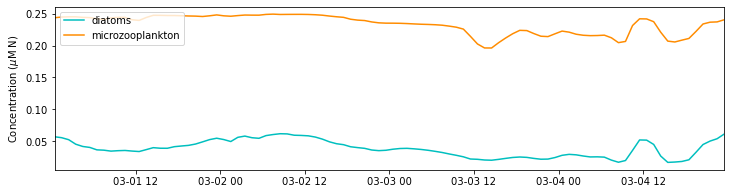

In [19]:
%%time
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(modt,diat1905,'c-',label='diatoms')
ax.plot(modt,micZ1905,'-',color='darkorange',label='microzooplankton')
ax.legend(loc=2);
ax.set_ylabel('Concentration ($\mu$M N)')
ax.set_xlim(modt[0],modt[-1]);

In [20]:
hc1905.close()

## back to accessing files from /results and /results2, but now switch to loading 201905 results

In [2]:
basedir='/results/SalishSea/nowcast-green.201812/'

## Plotting jan 1 -- dec 31 Surface phytoplankton and nitrate at S3 for 2015:

In [3]:
newstart=dt.datetime(2015,1,1)
newend=dt.datetime(2015,6,1)
nam_fmt='nowcast'
flen=1 # files contain 1 day of data each
ftype= 'ptrc_T' # load bio files
tres=24 # 1: hourly resolution; 24: daily resolution   <- try changing to 1 and loading hourly data
flist=et.index_model_files(newstart,newend,basedir,nam_fmt,flen,ftype,tres)
# flist contains paths: file pathes; t_0 timestemp of start of each file; t_n: timestamp of start of next file
# a list of the files we want between start and end date
print(flist)

                                                 paths        t_0        t_n
0    /results/SalishSea/nowcast-green.201812/01jan1... 2015-01-01 2015-01-02
1    /results/SalishSea/nowcast-green.201812/02jan1... 2015-01-02 2015-01-03
2    /results/SalishSea/nowcast-green.201812/03jan1... 2015-01-03 2015-01-04
3    /results/SalishSea/nowcast-green.201812/04jan1... 2015-01-04 2015-01-05
4    /results/SalishSea/nowcast-green.201812/05jan1... 2015-01-05 2015-01-06
..                                                 ...        ...        ...
147  /results/SalishSea/nowcast-green.201812/28may1... 2015-05-28 2015-05-29
148  /results/SalishSea/nowcast-green.201812/29may1... 2015-05-29 2015-05-30
149  /results/SalishSea/nowcast-green.201812/30may1... 2015-05-30 2015-05-31
150  /results/SalishSea/nowcast-green.201812/31may1... 2015-05-31 2015-06-01
151  /results/SalishSea/nowcast-green.201812/01jun1... 2015-06-01 2015-06-02

[152 rows x 3 columns]


In [4]:
print(flist['paths'][0])

/results/SalishSea/nowcast-green.201812/01jan15/SalishSea_1d_20150101_20150101_ptrc_T.nc


In [5]:
bio2=xr.open_mfdataset(flist['paths'])
ij,ii=places.PLACES['S3']['NEMO grid ji']
ik=0 # choose surface level
bio2

<xarray.Dataset>
Dimensions:                       (axis_nbounds: 2, deptht: 40, nvertex: 4, time_counter: 152, x: 398, y: 898)
Coordinates:
    nav_lat                       (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    nav_lon                       (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
  * deptht                        (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
    time_centered                 (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter                  (time_counter) datetime64[ns] 2015-01-01T12...
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    bounds_lon                    (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    bounds_lat                    (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    area                          (time_counter, y, x) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
    deptht_bounds                 (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(1, 40, 2), meta=np.ndarray>
    nitrate                       (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    time_centered_bounds          (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds           (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    ammonium                      (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    silicon                       (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    diatoms                       (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    flagellates                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    ciliates                      (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    microzooplankton              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_organic_nitrogen    (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    particulate_organic_nitrogen  (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    biogenic_silicon              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    Fraser_tracer                 (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    mesozooplankton               (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSea_1d_20150101_20150110
    description:  biogeochemical variables
    title:        biogeochemical variables
    Conventions:  CF-1.6
    timeStamp:    2018-Dec-27 15:54:51 GMT
    uuid:         eb668b0e-3d35-4a63-9514-6f7bc8af9657

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(12,3))
p1=ax.plot(bio2.time_centered,bio2.diatoms.isel(deptht=ik,y=ij,x=ii)+\
        bio2.flagellates.isel(deptht=ik,y=ij,x=ii)+bio2.ciliates.isel(deptht=ik,y=ij,x=ii),
           '-',color='teal',label='Phytoplankton')
p2=ax.plot(bio2.time_centered,bio2.nitrate.isel(deptht=ik,y=ij,x=ii),
           '-',color='orange',label='Nitrate')
ax.legend(handles=[p1[0],p2[0]],loc=1)
ax.set_ylabel('$\mu$M N')

## Fraser River flow for same times (2015)

In [7]:
# reading Fraser river flow files
# skiprows = 1 tells the read_csv function
dfFra=pd.read_csv('/ocean/eolson/MEOPAR/obs/ECRivers/Flow/FraserHopeDaily__Dec-2-2020_10_31_05PM.csv',
                  skiprows=1)
# the original file contains both flow and water level information in the same field (Value)
# keep only the flow data, where PARAM=1 (drop PARAM=2 values)
# flow units are m3/s
# DD is YD, year day (1 is jan 1)
dfFra.drop(dfFra.loc[dfFra.PARAM==2].index,inplace=True)  # we arent interested in water level data

In [8]:
# rename 'Value' column to 'Flow' now that we have removed all the water level rows
dfFra.rename(columns={'Value':'Flow'}, inplace=True) 
    # inplace=True does this function on the orginical dataframe

In [9]:
dfFra

,ID,PARAM,YEAR,DD,Flow,SYM
0,08MF005,1,1912,61,538.0,NaN
1,08MF005,1,1912,62,538.0,NaN
2,08MF005,1,1912,63,538.0,NaN
3,08MF005,1,1912,64,538.0,NaN
4,08MF005,1,1912,65,538.0,NaN
...,...,...,...,...,...,...
39016,08MF005,1,2018,360,1090.0,NaN
39017,08MF005,1,2018,361,1050.0,NaN
39018,08MF005,1,2018,362,1030.0,NaN
39019,08MF005,1,2018,363,1120.0,NaN


In [ ]:
# no time information so use dt.date
dfFra['Date']=[dt.date(iyr,1,1)+dt.timedelta(days=idd-1) for iyr, idd in zip(dfFra['YEAR'],dfFra['DD'])]
# taking the value from the yr column, jan1st date, and kmaking jan1 column ot be 1 not 0

In [13]:
dfFra.head(2)

,ID,PARAM,YEAR,DD,Flow,SYM,Date
0,08MF005,1,1912,61,538.0,NaN,1912-03-01
1,08MF005,1,1912,62,538.0,NaN,1912-03-02


In [14]:
# select portion of dataframe in desired date range
dfFra2=dfFra.loc[(dfFra.Date>=newstart.date())&(dfFra.Date<=newend.date())]
# could also write dfFra['Date'], sometimes this is required
# newstart is a datetime object, so we convert it to just a date with .date

Text(0.5, 1.0, 'Fraser Flow at Hope')

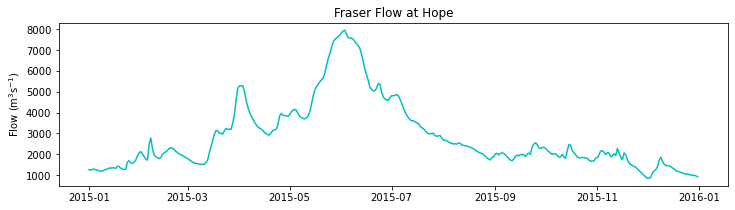

In [15]:
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(dfFra2['Date'],dfFra2['Flow'],'c-')
ax.set_ylabel('Flow (m$^3$s$^{-1}$)')
ax.set_title('Fraser Flow at Hope')

### 2016 surface phytoplankton and nitrate

In [5]:
basedir='/results/SalishSea/nowcast-green.201812/'
newstart=dt.datetime(2016,1,1)
newend=dt.datetime(2016,12,31)
nam_fmt='nowcast'
flen=1 # files contain 1 day of data each
ftype= 'ptrc_T' # load bio files
tres=24 # 1: hourly resolution; 24: daily resolution   <- try changing to 1 and loading hourly data
flist=et.index_model_files(newstart,newend,basedir,nam_fmt,flen,ftype,tres)

bio3=xr.open_mfdataset(flist['paths'])
ij,ii=places.PLACES['S3']['NEMO grid ji']
ik=0 # choose surface level
bio3

<xarray.Dataset>
Dimensions:                       (axis_nbounds: 2, deptht: 40, nvertex: 4, time_counter: 366, x: 398, y: 898)
Coordinates:
    nav_lat                       (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    nav_lon                       (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
  * deptht                        (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
    time_centered                 (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter                  (time_counter) datetime64[ns] 2016-01-01T12...
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    bounds_lon                    (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    bounds_lat                    (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    area                          (time_counter, y, x) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
    deptht_bounds                 (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(1, 40, 2), meta=np.ndarray>
    nitrate                       (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    time_centered_bounds          (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds           (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    ammonium                      (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    silicon                       (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    diatoms                       (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    flagellates                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    ciliates                      (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    microzooplankton              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_organic_nitrogen    (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    particulate_organic_nitrogen  (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    biogenic_silicon              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    Fraser_tracer                 (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    mesozooplankton               (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSea_1d_20160101_20160110
    description:  biogeochemical variables
    title:        biogeochemical variables
    Conventions:  CF-1.6
    timeStamp:    2019-Jan-04 19:28:07 GMT
    uuid:         fc9a8752-9bdc-4b5c-80f7-6a441db0720d

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(12,3))
p1=ax.plot(bio3.time_centered,bio3.diatoms.isel(deptht=ik,y=ij,x=ii)+\
        bio3.flagellates.isel(deptht=ik,y=ij,x=ii)+bio3.ciliates.isel(deptht=ik,y=ij,x=ii),
           '-',color='teal',label='Phytoplankton')
p2=ax.plot(bio3.time_centered,bio2.nitrate.isel(deptht=ik,y=ij,x=ii),
           '-',color='orange',label='Nitrate')
ax.legend(handles=[p1[0],p2[0]],loc=1)
ax.set_ylabel('$\mu$M N')

### 2015 Fraser River Flow